# Import package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import Data

In [3]:
df = pd.read_csv('../raw_data/FM_data_21.csv', low_memory = False)

In [4]:
df

Name                                     \
0        Kevin De Bruyne                           
1        Harry Kane                                
2        Mohamed Salah                             
3        Sadio Mané                                
4        Son Heung-Min                             
...                                          ...   
174569          Nick Brown                         
174570          Luis Alcalá                        
174571          Devin Lee                          
174572          Yeferson Suárez                    
174573          Nguyen Van Hai                     

         Club                                Nat   \
0        Man City                            BEL    
1        Tottenham                           ENG    
2        Liverpool                           EGY    
3        Liverpool                           SEN    
4        Tottenham                           KOR    
...                                    ...    ...   
174569      Charlotte FC Academy             USA    
174570      Charlotte FC Academy             USA    
174571      Charlotte FC Academy             USA    
174572      Charlotte FC Academy             USA    
174573      Charlotte FC Academy             VIE    

        Division                                             \
0        English Premier Division                     ...     
1        English Premier Division                     ...     
2        English Premier Division                     ...     
3        English Premier Division                     ...     
4        English Premier Division                     ...     
...                                                   ...     
174569     Lower Leagues                                      
174570     Lower Leagues                                      
174571     Lower Leagues                                      
174572     Lower Leagues                                      
174573     Lower Leagues                                      

         Position                              \
0        M (RLC), AM (C)                        
1        AM (C), ST (C)                         
2        AM (RL), ST (C)                        
3        AM (RL), ST (C)                        
4        M/AM (RL), ST (C)                      
...                                       ...   
174569         ST (C)                           
174570         ST (C)                           
174571         D (C)                            
174572         M (C)                            
174573         AM (R)                           

          Sec. Position                       DoB                         \
0         M (RL)                              28/6/1991 (29 years old)     
1         AM (C)                              28/7/1993 (27 years old)     
2         AM (L)                              15/6/1992 (28 years old)     
3         ST (C)                              10/4/1992 (28 years old)     
4         M (RL), AM (R)                      8/7/1992 (28 years old)      
...                                     ...                          ...   
174569   -                                    13/12/2004 (15 years old)    
174570   -                                    11/5/2004 (16 years old)     
174571   -                                    4/4/2003 (17 years old)      
174572   -                                    4/1/2004 (16 years old)      
174573   -                                    19/4/2004 (16 years old)     

        Age    Preferred Foot    Right Foot      ...  Bal   Kic   Sta   Agi   \
0         29   Either            Very Strong     ...    15     3    17    13   
1         26   Either            Very Strong     ...    13     3    17    12   
2         28   Left              Weak            ...    18     1    14    16   
3         28   Right             Very Strong     ...    16     1    14    16   
4         28   Either            Very Strong     ...    12     2    16    15   
...     

In [68]:
df.head()

Age  Height  Weight   Agg   Jum  Pun  Nat .1   Vis  L Th   Lon  ...  \
0  29.0   181.0    68.0  12.0  10.0  1.0    16.0  20.0   8.0  16.0  ...   
1  26.0   188.0    86.0  11.0  13.0  2.0    16.0  18.0   6.0  16.0  ...   
2  28.0   175.0    72.0  10.0   8.0  2.0    17.0  17.0   6.0  13.0  ...   
3  28.0   175.0    69.0  10.0  11.0  3.0    18.0  15.0   3.0  12.0  ...   
4  28.0   183.0    77.0   8.0  10.0  2.0    16.0  12.0   6.0  16.0  ...   

   speed_agility  strength_stamina  physical_characteristics  decision_making  \
0      14.000000         15.000000                     124.5             16.5   
1      12.333333         14.666667                     137.0             17.0   
2      17.333333         15.666667                     123.5             14.0   
3      17.333333         14.000000                     122.0             15.0   
4      15.333333         12.666667                     130.0             15.0   

   work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0          14.000000         7.0      14.0               1.714286   
1          17.666667         8.0      18.0               2.571429   
2          14.000000         6.5      14.0               2.142857   
3          13.666667         4.5      15.0               2.142857   
4          12.000000         8.0      15.0               2.000000   

   behavioral_attributes  player_traits  
0                    6.5            3.0  
1                    6.5            3.0  
2                    6.0            2.0  
3                    6.5            4.0  
4                    5.0            1.0  

[5 rows x 65 columns]

# Data Cleaning

In [5]:
df.rename(str.strip, axis='columns', inplace = True)

In [6]:
# Create a new dataset with the numerical features for the followings steps.

columns_to_remove = ["Name", "Club", "Nat", "Division", "Position", "Sec. Position", "DoB", "Preferred Foot", "Right Foot", "Left Foot", "AT Lge Gls", "AT Lge Apps", "Wage", "Last Trans. Fee", "Value", "Rc Injury"]

# Remove specified columns
df.drop(columns=columns_to_remove, inplace=True)

# Extract numerical values from the 'height' column
df['Height'] = df['Height'].str.extract('(\d+)').astype(float)

# Extract numerical values from the 'weight' column
df['Weight'] = df['Weight'].str.extract('(\d+)').astype(float)

In [7]:
df.head()

Age  Height  Weight Agg Jum Pun Nat .1 Vis L Th Lon  ... Bal Kic Sta Agi  \
0  29   181.0    68.0  12  10   1     16  20    8  16  ...  15   3  17  13   
1  26   188.0    86.0  11  13   2     16  18    6  16  ...  13   3  17  12   
2  28   175.0    72.0  10   8   2     17  17    6  13  ...  18   1  14  16   
3  28   175.0    69.0  10  11   3     18  15    3  12  ...  16   1  14  16   
4  28   183.0    77.0   8  10   2     16  12    6  16  ...  12   2  16  15   

  Wor Bra Cmd Fin 1v1 TRO  
0  15  12   3  16   1   3  
1  18  16   2  19   3   3  
2  15  11   3  18   3   2  
3  15  11   3  17   2   4  
4  17   6   2  18   2   1  

[5 rows x 50 columns]

In [8]:
df.dtypes

Age        object
Height    float64
Weight    float64
Agg        object
Jum        object
Pun        object
Nat .1     object
Vis        object
L Th       object
Lon        object
OtB        object
Tck        object
Tec        object
Tea        object
Cmp        object
Fre        object
Ref        object
Pos        object
Pen        object
Pas        object
Fla        object
Ant        object
Cro        object
Mar        object
Ldr        object
Cor        object
Cnt        object
Det        object
Dec        object
Hea        object
Fir        object
Com        object
Acc        object
Pac        object
Aer        object
Str        object
Thr        object
Han        object
Ecc        object
Dri        object
Bal        object
Kic        object
Sta        object
Agi        object
Wor        object
Bra        object
Cmd        object
Fin        object
1v1        object
TRO        object
dtype: object

In [9]:
# Convert all data to floats
df = df.apply(pd.to_numeric, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174574 entries, 0 to 174573
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Age     174324 non-null  float64
 1   Height  174324 non-null  float64
 2   Weight  174324 non-null  float64
 3   Agg     174324 non-null  float64
 4   Jum     174324 non-null  float64
 5   Pun     174324 non-null  float64
 6   Nat .1  174324 non-null  float64
 7   Vis     174324 non-null  float64
 8   L Th    174324 non-null  float64
 9   Lon     174324 non-null  float64
 10  OtB     174324 non-null  float64
 11  Tck     174324 non-null  float64
 12  Tec     174324 non-null  float64
 13  Tea     174324 non-null  float64
 14  Cmp     174324 non-null  float64
 15  Fre     174324 non-null  float64
 16  Ref     174324 non-null  float64
 17  Pos     174324 non-null  float64
 18  Pen     174324 non-null  float64
 19  Pas     174324 non-null  float64
 20  Fla     174324 non-null  float64
 21  Ant     17

In [11]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

Age       250
Height    250
Weight    250
Agg       250
Jum       250
Pun       250
Nat .1    250
Vis       250
L Th      250
Lon       250
OtB       250
Tck       250
Tec       250
Tea       250
Cmp       250
Fre       250
Ref       250
Pos       250
Pen       250
Pas       250
Fla       250
Ant       250
Cro       250
Mar       250
Ldr       250
Cor       250
Cnt       250
Det       250
Dec       250
Hea       250
Fir       250
Com       250
Acc       250
Pac       250
Aer       250
Str       250
Thr       250
Han       250
Ecc       250
Dri       250
Bal       250
Kic       250
Sta       250
Agi       250
Wor       250
Bra       250
Cmd       250
Fin       250
1v1       250
TRO       250
dtype: int64

In [12]:
df_cleaned = df.dropna()

# Principal Component Analysis (PCA)
## Scale features 

In [13]:
X = df_cleaned

#⚠️ Data must be centered around its mean before a K-Means Clustering ⚠️

scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))#, columns=players_features)
X

0         1         2         3         4         5         6   \
0       0.926797  0.096527 -0.648276  0.616199  0.316268 -0.719879  1.557819   
1       0.388159  1.082567  1.799982  0.293840  1.186414 -0.337384  1.557819   
2       0.747251 -0.748649 -0.104219 -0.028518 -0.263830 -0.337384  1.933139   
3       0.747251 -0.748649 -0.512262 -0.028518  0.606316  0.045112  2.308460   
4       0.747251  0.378253  0.575853 -0.673235  0.316268 -0.337384  1.557819   
...          ...       ...       ...       ...       ...       ...       ...   
174319 -1.586849  0.096527 -1.056319  0.938557  0.026219  0.045112 -2.195389   
174320 -1.407303 -0.326061 -1.056319  1.583274 -0.553879 -0.337384  0.431857   
174321 -1.227757  2.209469  1.255924  0.616199  1.766511  0.045112  0.807177   
174322 -1.407303 -2.579865 -2.416462  1.583274 -1.424025 -0.719879  1.933139   
174323 -1.407303 -0.466924 -1.328348 -0.028518 -0.263830 -0.337384 -1.820068   

              7         8         9   ...        40        41        42  \
0       3.857242  1.142988  2.925628  ...  2.269040  0.049969  2.363050   
1       3.230011  0.496028  2.925628  ...  1.607894  0.049969  2.363050   
2       2.916396  0.496028  2.016705  ...  3.260760 -0.729305  1.474700   
3       2.289165 -0.474413  1.713731  ...  2.599614 -0.729305  1.474700   
4       1.348318  0.496028  2.925628  ...  1.277320 -0.339668  2.066934   
...          ...       ...       ...  ...       ...       ...       ...   
174319 -0.533375 -0.797894 -0.104115  ...  1.607894 -0.729305  0.290233   
174320 -0.533375 -0.797894 -0.407089  ...  0.946747 -0.339668 -0.302001   
174321 -0.533375  0.496028 -0.407089  ...  2.599614 -0.729305  0.882466   
174322  0.721087 -0.474413  0.198860  ... -0.044973  0.049969 -0.598118   
174323 -1.160606 -0.474413 -0.407089  ... -0.706120  0.439606 -0.302001   

              43        44        45        46        47        48        49  
0       0.910932  1.819433  1.027120  0.068263  2.569168 -0.754393  0.046654  
1       0.459615  2.811857  2.194836 -0.341596  3.381038  0.090337  0.046654  
2       2.264883  1.819433  0.735191  0.068263  3.110415  0.090337 -0.336647  
3       2.264883  1.819433  0.735191  0.068263  2.839792 -0.332028  0.429955  
4       1.813566  2.481049 -0.724453 -0.341596  3.110415 -0.332028 -0.719948  
...          ...       ...       ...       ...       ...       ...       ...  
174319 -0.443019  1.819433  0.151333 -0.751454  2.027922 -0.332028  0.046654  
174320 -0.894337 -1.157839 -0.724453 -0.341596  1.216052 -0.332028  0.046654  
174321 -1.345654  2.481049  1.319049 -0.341596 -0.407688 -0.332028 -0.719948  
174322 -0.894337  0.496201  0.151333  0.068263 -0.137064 -0.754393 -0.719948  
174323  1.362249  1.157817  2.194836  0.068263 -0.678311 -0.754393 -0.336647  

[174324 rows x 50 columns]

<AxesSubplot:>

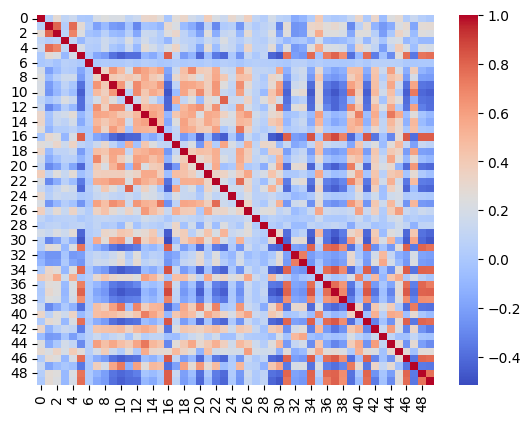

In [14]:
# Show features on a heatmap

sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [15]:
# a) Compute the Principal Components

pca = PCA()
pca.fit(X)

PCA()

In [16]:
# Access our 50 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 columns=[f'PC{i}' for i in range(1, 51)])

In [17]:
# b) Project our dataset into this new space of PCs

X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 51)])
X_proj

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -9.878872  5.942699  3.941414 -1.131408  0.225134 -1.382573 -1.137471   
1      -8.978987  8.114790  0.921494  0.747906 -0.720965 -0.950592 -1.599226   
2      -8.782408  5.294945  4.375131 -1.143694 -3.190563  0.062357 -1.534565   
3      -8.020648  4.626154  3.070863 -1.764415 -3.860354 -0.498884 -2.403398   
4      -7.677653  3.800295  3.648538  0.576660 -2.347791 -0.427968 -1.838111   
...          ...       ...       ...       ...       ...       ...       ...   
174319 -1.443640 -1.506255  1.890088  1.537879 -0.243113 -0.306220  1.210953   
174320  0.337174 -3.003739  1.650075  2.107282  0.590395  0.466317  1.466688   
174321 -0.512971  1.573910 -3.933947  1.155571  0.501535 -1.450171  2.848876   
174322 -0.824677 -1.313738  0.690049 -2.053600  4.679719  0.299758 -0.474522   
174323  0.680973 -2.522533  1.827789  0.305637 -1.118372  1.302178  1.979629   

             PC8       PC9      PC10  ...      PC41      PC42      PC43  \
0       1.493695 -1.452712 -0.383331  ...  0.207253 -0.505523  0.242956   
1       2.285844 -1.337031 -0.955523  ... -0.137788  0.047279  0.172700   
2       1.211839 -1.272556 -0.108345  ... -0.458746 -0.750669  0.364757   
3       1.640452 -1.611227  0.236944  ... -0.411409 -0.784034  0.184222   
4       1.503986  0.221169  0.201973  ...  0.109223  0.006211  1.103500   
...          ...       ...       ...  ...       ...       ...       ...   
174319 -0.476246  0.781666 -0.433761  ... -0.031973 -1.092089  0.301549   
174320  0.848911 -1.234045  0.986267  ... -0.324482  0.333178  0.660180   
174321  0.958161 -0.618329  0.762608  ... -0.424519 -0.369337 -0.090697   
174322  2.621686 -0.517069  2.221573  ...  0.037539  0.036968 -0.608794   
174323 -1.418551  1.059415  0.011643  ...  0.274090  0.589452 -0.576025   

            PC44      PC45      PC46      PC47      PC48      PC49      PC50  
0      -0.581696  0.614218  0.142997 -0.799847 -0.211775  0.339173 -0.701411  
1      -0.090531 -0.134526  0.403269 -1.189623 -0.736396  0.058080  0.027076  
2       0.149126  0.098464  0.180195  0.065081 -0.500009 -0.111071 -0.277996  
3       0.558916 -0.087748 -0.365212 -0.790651  0.116005 -0.013658  0.220409  
4       0.004743 -0.747272  0.235443  0.178461  0.306635 -0.114982 -0.213683  
...          ...       ...       ...       ...       ...       ...       ...  
174319 -0.302382  0.431294  0.561057 -0.639022 -0.152802 -0.044164 -0.460140  
174320 -0.145339 -0.097508 -0.684482 -0.433991  0.230545 -0.156250 -0.348014  
174321  0.014051  0.328054  0.458432 -0.019295 -0.318923 -0.031658 -0.339766  
174322 -0.260911 -1.135035 -1.303175 -0.658009 -0.237681 -0.570528  0.422905  
174323 -0.137545  0.464735 -0.265320  0.313808  0.325842  0.067016  0.002324  

[174324 rows x 50 columns]

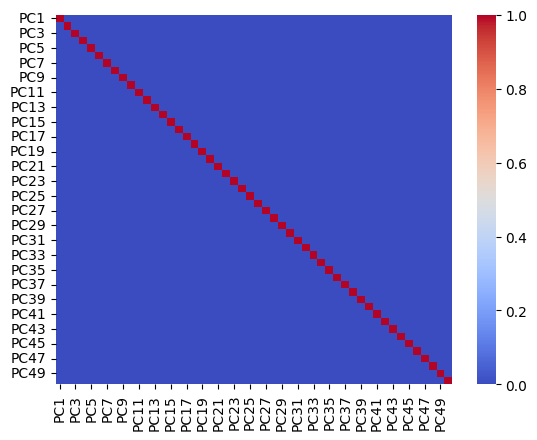

In [18]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

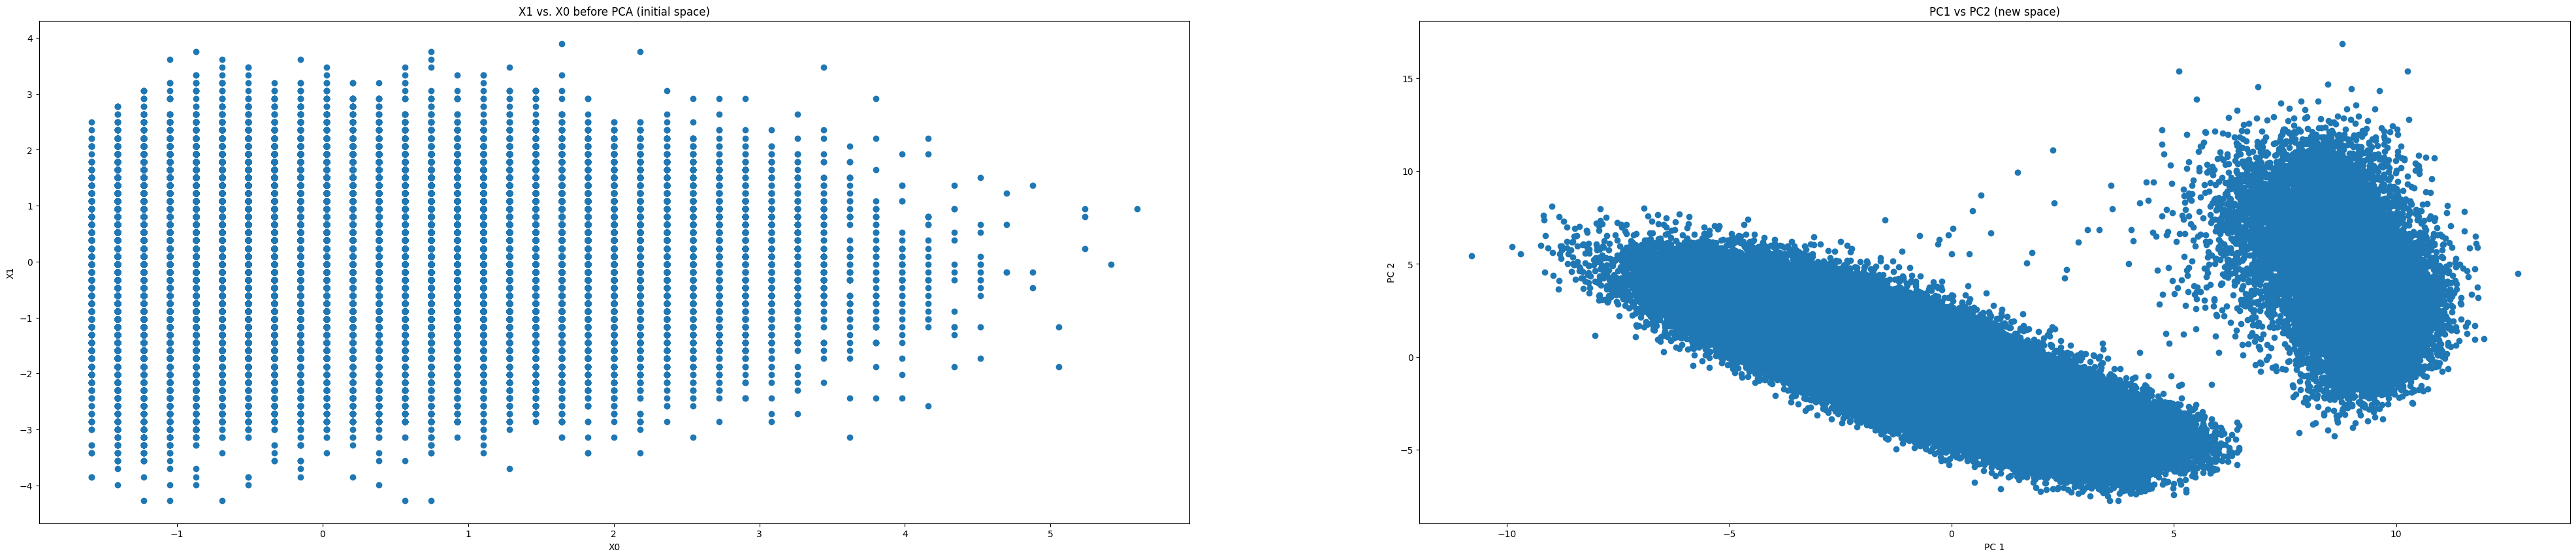

In [19]:
# 2D-slice

plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [20]:
# Computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X", X.shape)

Shape of W:  (50, 50)
Shape of X (174324, 50)


In [21]:
np.allclose(
    pca.transform(X),
    np.dot(X,W)
)

True

## PCs are ranked by order of importance

In [22]:
pca.explained_variance_ratio_

array([0.29441431, 0.16691538, 0.08964077, 0.04680074, 0.03600767,
       0.02508139, 0.02241569, 0.02105265, 0.01997255, 0.01859403,
       0.01821969, 0.01761345, 0.01404805, 0.01157583, 0.01114801,
       0.0101051 , 0.00917157, 0.00884325, 0.00833564, 0.00797372,
       0.00764253, 0.00702262, 0.00697136, 0.00692663, 0.0066025 ,
       0.00623159, 0.00608199, 0.00567319, 0.00550445, 0.00545988,
       0.00516549, 0.00514334, 0.00494072, 0.00468867, 0.00461156,
       0.00444884, 0.00428522, 0.00412114, 0.00403349, 0.0038724 ,
       0.00381461, 0.00376003, 0.00369731, 0.00351887, 0.00345866,
       0.00341489, 0.00312452, 0.00302007, 0.00245262, 0.00238133])

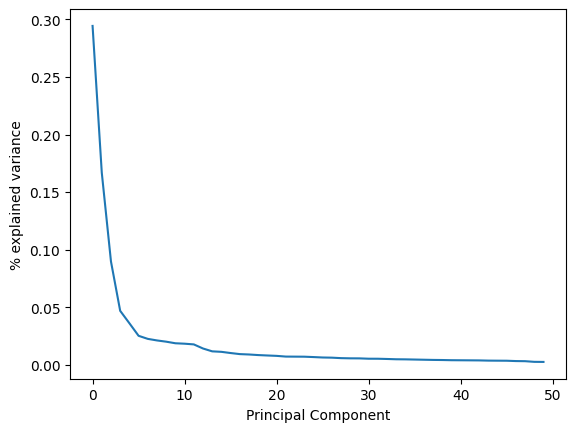

In [23]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

## PCA for Dimensionality Reduction
How to choose k? It's a trade-off between compression and performance

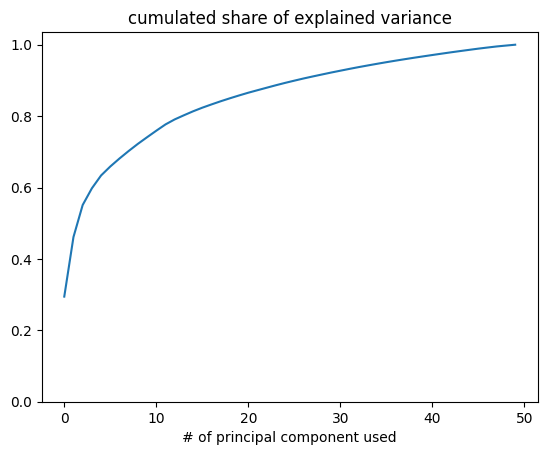

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [25]:
np.cumsum(pca.explained_variance_ratio_)


array([0.29441431, 0.46132968, 0.55097046, 0.59777119, 0.63377887,
       0.65886025, 0.68127594, 0.7023286 , 0.72230115, 0.74089518,
       0.75911486, 0.77672832, 0.79077637, 0.80235219, 0.8135002 ,
       0.82360531, 0.83277688, 0.84162012, 0.84995577, 0.85792949,
       0.86557202, 0.87259464, 0.879566  , 0.88649262, 0.89309513,
       0.89932671, 0.9054087 , 0.91108189, 0.91658634, 0.92204622,
       0.92721171, 0.93235505, 0.93729576, 0.94198444, 0.946596  ,
       0.95104485, 0.95533007, 0.9594512 , 0.9634847 , 0.9673571 ,
       0.97117171, 0.97493173, 0.97862904, 0.98214791, 0.98560657,
       0.98902146, 0.99214598, 0.99516605, 0.99761867, 1.        ])

The Elbow Method Look for the inflection point in the explained variance chart !on In 35! Here, k=3 looks promising

In [26]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the inflection point using the Elbow Method
# In this example, we use a simple heuristic of finding the point where the slope changes the most
slope = np.diff(cumulative_explained_variance)
inflection_point = np.argmax(slope) + 1 

inflection_point

1

Michiel suggest to use 20 features

Test Model Performance (with k=20 Dimensions)

In [27]:
# Fit a PCA with only 20 components
pca3 = PCA(n_components=20).fit(X)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components + 1)]

# Project your data into 3 dimensions
X_proj3 = pd.DataFrame(pca3.fit_transform(X), columns=pc_columns)

# We have "compressed" our dataset in 3D
X_proj3

NameError: name 'n_components' is not defined

In [28]:
# Fit a PCA with only 20 components
pca20 = PCA(n_components=20).fit(X)

# Project your data into 3 dimensions
X_proj3 = pd.DataFrame(pca3.fit_transform(X), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20"])

# We have "compressed" our dataset in 3D
X_proj3

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -9.878872  5.942699  3.941420 -1.131482  0.225086 -1.383226 -1.138164   
1      -8.978987  8.114791  0.921499  0.747947 -0.721113 -0.949566 -1.600417   
2      -8.782408  5.294945  4.375136 -1.143753 -3.190754  0.061477 -1.534934   
3      -8.020648  4.626154  3.070871 -1.764447 -3.860694 -0.499228 -2.404016   
4      -7.677653  3.800295  3.648541  0.576649 -2.347821 -0.428681 -1.837604   
...          ...       ...       ...       ...       ...       ...       ...   
174319 -1.443640 -1.506256  1.890087  1.537782 -0.242748 -0.306248  1.211464   
174320  0.337174 -3.003740  1.650089  2.107184  0.590017  0.465389  1.465797   
174321 -0.512971  1.573910 -3.933948  1.155517  0.501852 -1.450098  2.850268   
174322 -0.824678 -1.313739  0.690044 -2.053590  4.679909  0.300748 -0.475586   
174323  0.680973 -2.522533  1.827787  0.305725 -1.117992  1.303855  1.979296   

             PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0       1.492254 -1.452148 -0.383862 -1.837830 -1.377109  0.578992  0.635324   
1       2.285060 -1.335162 -0.952401 -0.076862 -0.418065 -0.914891 -0.314835   
2       1.211018 -1.271216 -0.106966 -0.071252 -0.593866  0.372013 -0.379388   
3       1.639394 -1.612200  0.240237  0.820927  0.210809  0.431863  0.267782   
4       1.503414  0.222045  0.206450  0.030167 -1.056129 -0.129441  0.412108   
...          ...       ...       ...       ...       ...       ...       ...   
174319 -0.477900  0.782230 -0.436025  0.553580  3.053569 -1.379198  0.327029   
174320  0.847585 -1.232055  0.984976  0.212437  2.302058 -0.574698  0.986248   
174321  0.957370 -0.617211  0.764174  1.692535  0.991086 -0.188324  0.529521   
174322  2.621160 -0.515286  2.213128 -0.556175  1.399548 -1.963750 -0.083811   
174323 -1.418794  1.057907  0.008989 -0.243130  1.200763 -1.806999 -0.586732   

            PC15      PC16      PC17      PC18      PC19      PC20  
0      -1.478522  0.265836 -0.506528 -0.389555 -0.459546  0.019394  
1      -1.911375  0.183924  0.387125  1.028711 -0.398315  1.232068  
2      -1.068677  0.488638 -0.215799  0.723315  0.477745  0.203763  
3      -0.532860  0.570542  0.447333 -0.739101  1.118671 -0.064237  
4      -0.492021  0.225787 -0.747418 -0.722860 -0.709563  1.669758  
...          ...       ...       ...       ...       ...       ...  
174319 -1.628434 -0.110866 -0.600946  0.125675  0.384001  0.933962  
174320 -0.511729 -0.531307  0.589759  0.328062  0.756050 -0.274165  
174321 -1.201279 -0.849961 -0.185022 -0.774432  0.873940  0.847295  
174322 -1.066293 -1.034497 -0.486910 -0.804272 -0.736534  0.387609  
174323 -1.384457 -1.132207 -0.367199  0.251964  2.220684 -0.212231  

[174324 rows x 20 columns]

Decompress ❓ Can you perfectly reconstruct X from X_proj3? Not if you kept k < 20 dimensions; information has been lost We can approximate X by reconstructing it with inverse_transform()

In [29]:
X_reconstructed = pca20.inverse_transform(X_proj3)
X_reconstructed.shape

(174324, 50)

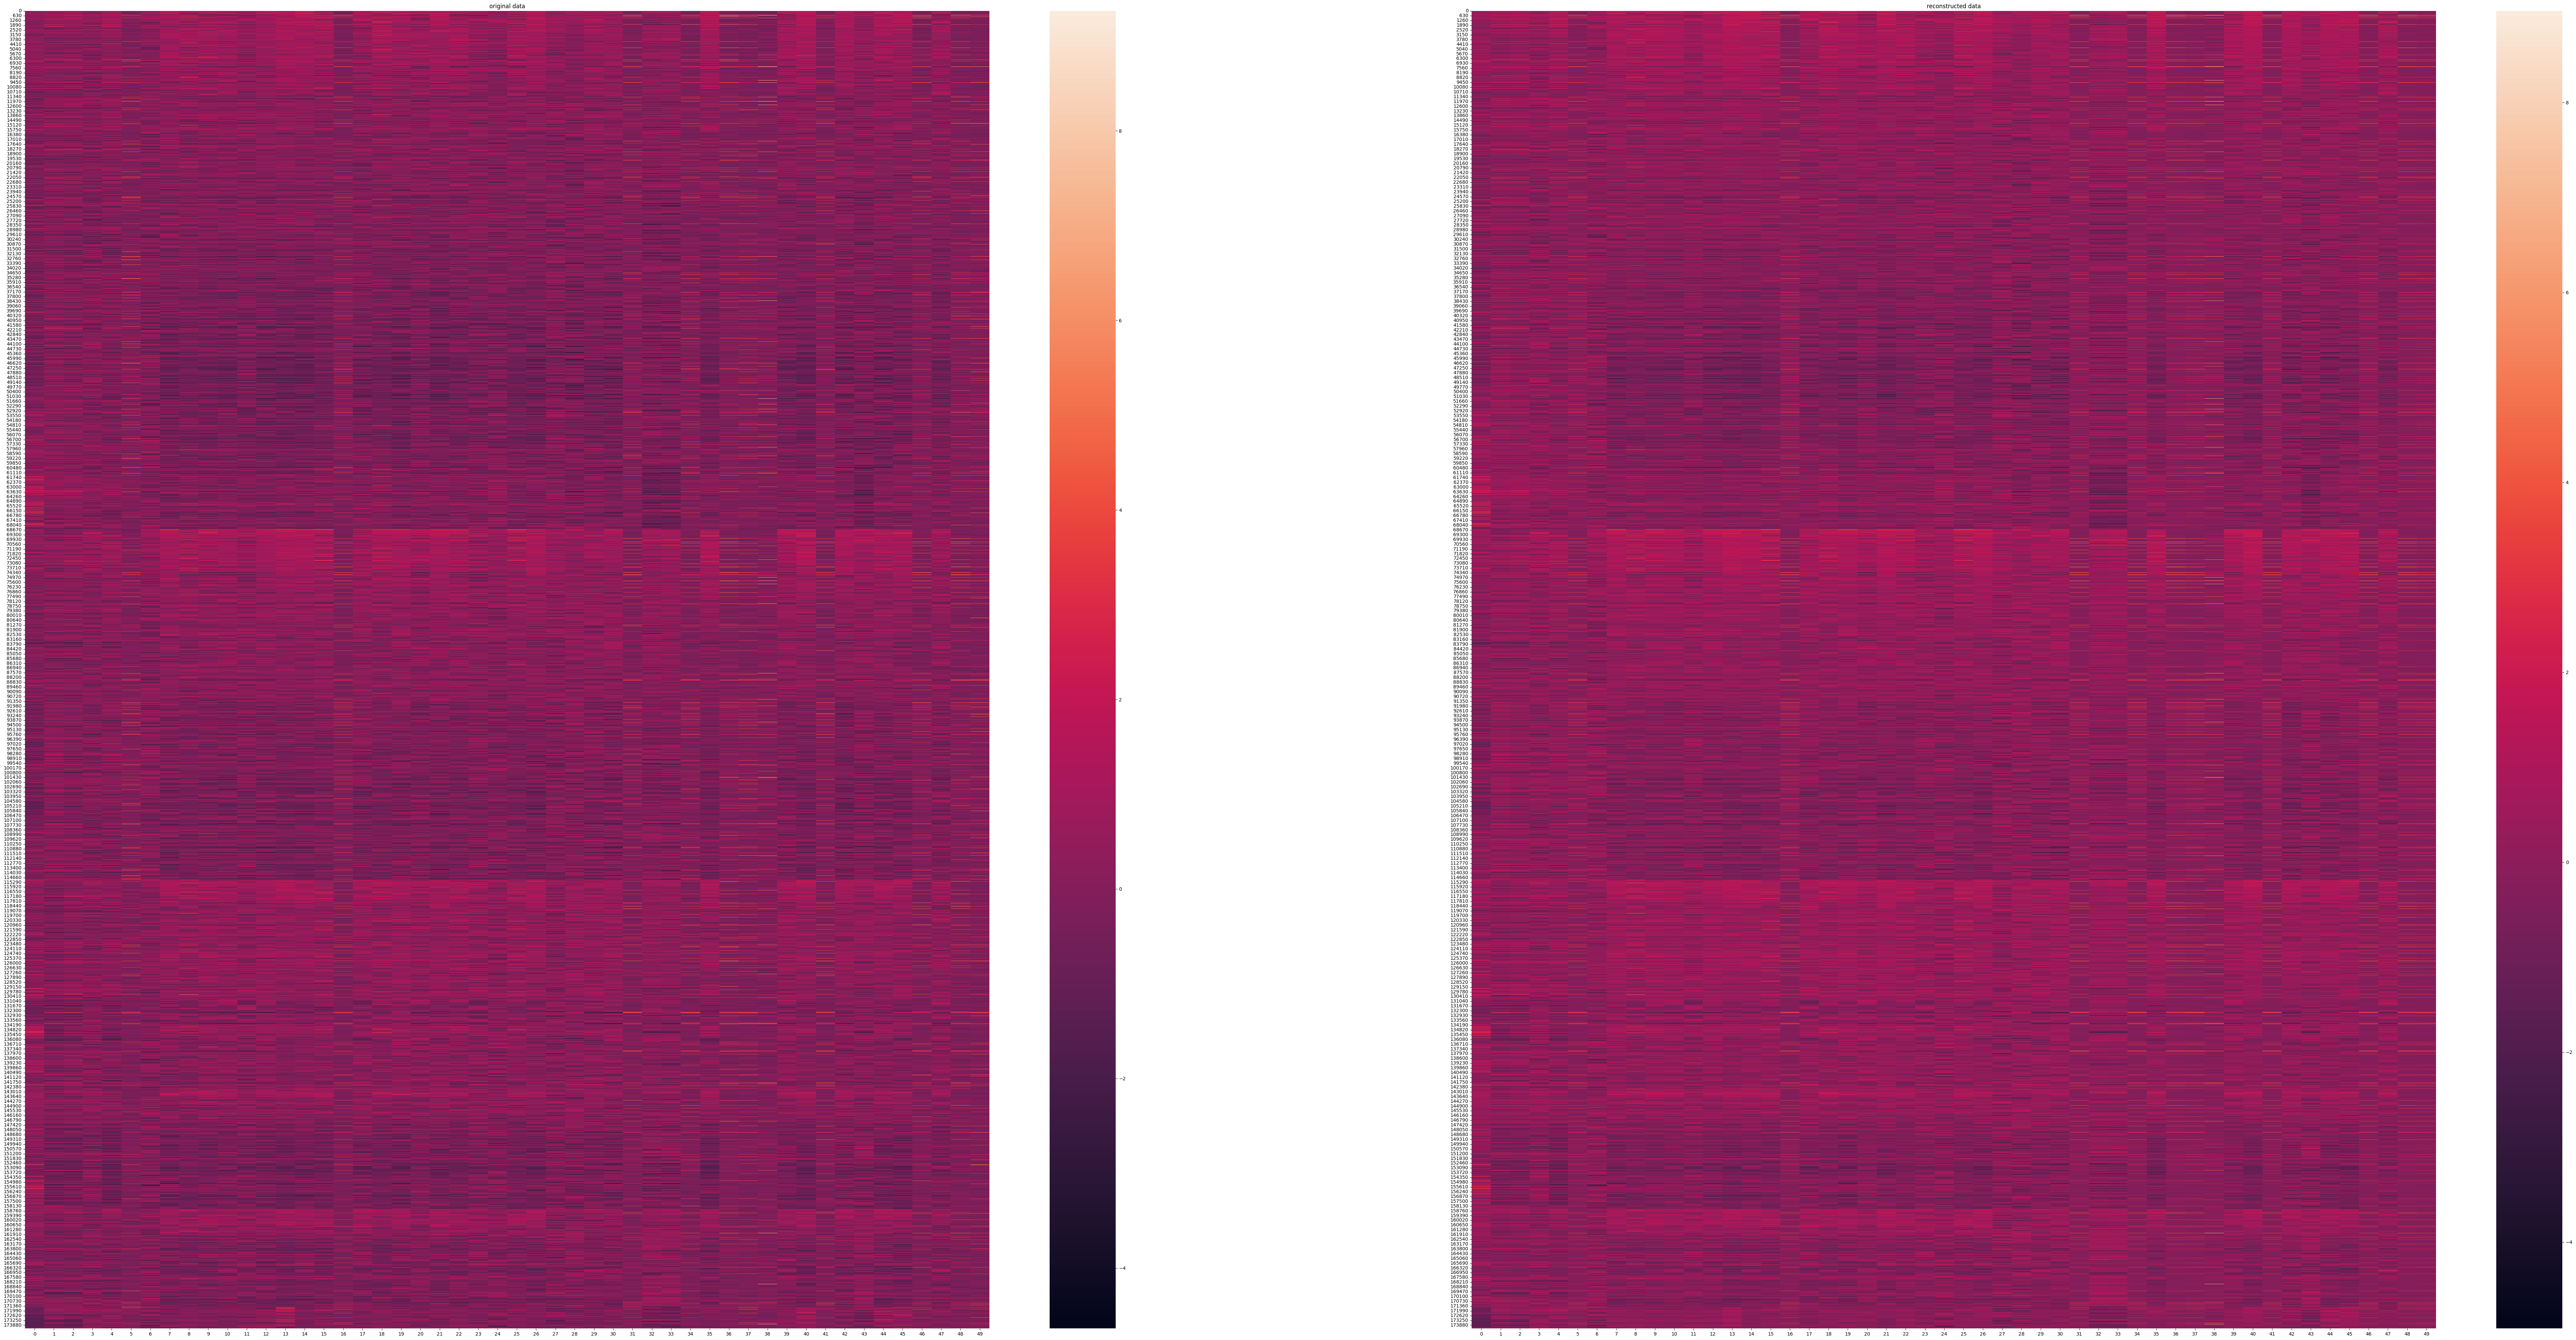

In [30]:
plt.figure(figsize=(100,50))
plt.subplot(1,2,1)
sns.heatmap(X)
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed);

## Clustering (Intro Through K-Means)
Let's try to find k = 20 clusters for our players dataset (suppose we don't know the true labels)

💡 First, let's place ourselves in the Principal Component space we had already computed Although not mandatory, applying PCA first helps to separate data more easily!

In [31]:
X_proj

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -9.878872  5.942699  3.941414 -1.131408  0.225134 -1.382573 -1.137471   
1      -8.978987  8.114790  0.921494  0.747906 -0.720965 -0.950592 -1.599226   
2      -8.782408  5.294945  4.375131 -1.143694 -3.190563  0.062357 -1.534565   
3      -8.020648  4.626154  3.070863 -1.764415 -3.860354 -0.498884 -2.403398   
4      -7.677653  3.800295  3.648538  0.576660 -2.347791 -0.427968 -1.838111   
...          ...       ...       ...       ...       ...       ...       ...   
174319 -1.443640 -1.506255  1.890088  1.537879 -0.243113 -0.306220  1.210953   
174320  0.337174 -3.003739  1.650075  2.107282  0.590395  0.466317  1.466688   
174321 -0.512971  1.573910 -3.933947  1.155571  0.501535 -1.450171  2.848876   
174322 -0.824677 -1.313738  0.690049 -2.053600  4.679719  0.299758 -0.474522   
174323  0.680973 -2.522533  1.827789  0.305637 -1.118372  1.302178  1.979629   

             PC8       PC9      PC10  ...      PC41      PC42      PC43  \
0       1.493695 -1.452712 -0.383331  ...  0.207253 -0.505523  0.242956   
1       2.285844 -1.337031 -0.955523  ... -0.137788  0.047279  0.172700   
2       1.211839 -1.272556 -0.108345  ... -0.458746 -0.750669  0.364757   
3       1.640452 -1.611227  0.236944  ... -0.411409 -0.784034  0.184222   
4       1.503986  0.221169  0.201973  ...  0.109223  0.006211  1.103500   
...          ...       ...       ...  ...       ...       ...       ...   
174319 -0.476246  0.781666 -0.433761  ... -0.031973 -1.092089  0.301549   
174320  0.848911 -1.234045  0.986267  ... -0.324482  0.333178  0.660180   
174321  0.958161 -0.618329  0.762608  ... -0.424519 -0.369337 -0.090697   
174322  2.621686 -0.517069  2.221573  ...  0.037539  0.036968 -0.608794   
174323 -1.418551  1.059415  0.011643  ...  0.274090  0.589452 -0.576025   

            PC44      PC45      PC46      PC47      PC48      PC49      PC50  
0      -0.581696  0.614218  0.142997 -0.799847 -0.211775  0.339173 -0.701411  
1      -0.090531 -0.134526  0.403269 -1.189623 -0.736396  0.058080  0.027076  
2       0.149126  0.098464  0.180195  0.065081 -0.500009 -0.111071 -0.277996  
3       0.558916 -0.087748 -0.365212 -0.790651  0.116005 -0.013658  0.220409  
4       0.004743 -0.747272  0.235443  0.178461  0.306635 -0.114982 -0.213683  
...          ...       ...       ...       ...       ...       ...       ...  
174319 -0.302382  0.431294  0.561057 -0.639022 -0.152802 -0.044164 -0.460140  
174320 -0.145339 -0.097508 -0.684482 -0.433991  0.230545 -0.156250 -0.348014  
174321  0.014051  0.328054  0.458432 -0.019295 -0.318923 -0.031658 -0.339766  
174322 -0.260911 -1.135035 -1.303175 -0.658009 -0.237681 -0.570528  0.422905  
174323 -0.137545  0.464735 -0.265320  0.313808  0.325842  0.067016  0.002324  

[174324 rows x 50 columns]

In [32]:
# Fit K-means
km = KMeans(n_clusters=20)
km.fit(X_proj)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [33]:
# The 20 centroids' coordinates (expressed in the space of PCs)
km.cluster_centers_.shape

(20, 50)

In [34]:
# The 174324 observations are classified automatically
km.labels_

array([ 5,  5,  5, ..., 15, 12, 11], dtype=int32)

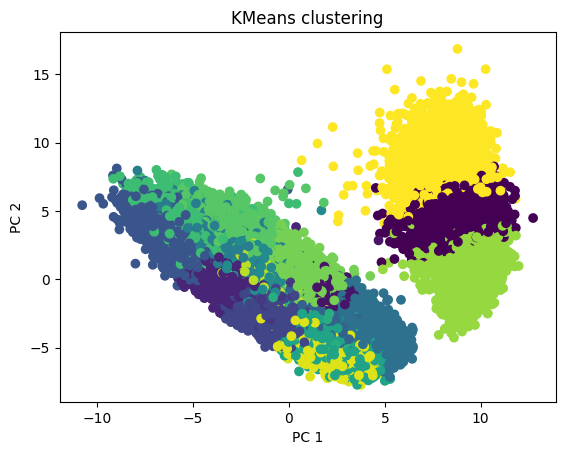

In [35]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

Predict? We can use the unsupervised K-means algorithm to predict (classify) a new X

In [36]:
# Build DF with column names from X_proj and some random data
new_X = pd.DataFrame(data = np.random.random((1,50)), columns = X_proj.columns)

km.predict(new_X)

array([17], dtype=int32)

## K-Means' Loss Function?¶
Choosing Hyperparameter K Choose K such that the inertia (Kmeans().inertia_) is minimized Use the elbow method here as well

# Elbow & K-Means Clustering for grouped features (manually)

1. Create a new dataframe 
2. Add the new features to the datafframe 
3. Apply k-means
4. Compare it with the previous K-means of MAX 

### Grouping of the 50 Features into Distinct Categories:
1. **Shooting**: 'fin' (Finishing), 'lon' (Long shots), 'fre' (Free-kick taking), 'pen' (Penalties).
2. **Dribbling and Control**: 'dri' (Dribbling), 'fir' (First touch), 'fla' (Flair), 'tec' (Technique).
3. **Passing and Vision**: 'pas' (Passing), 'vis' (Vision), 'l th' (Long throwing), 'cro' (Crossing), 'cor' (Corner-taking), 'otb' (Off the ball).
4. **Tackling and Interception**: 'tck' (Tackling), 'mar' (Marking), 'pos' (Positioning), 'ant' (Anticipation).
5. **Aerial Defense**: 'hea' (Heading), 'jum' (Jumping), 'aer' (Aerial ability).
6. **Speed and Agility**: 'acc' (Acceleration), 'pac' (Pace), 'agi' (Agility).
7. **Strength and Stamina**: 'str' (Strength), 'sta' (Stamina), 'bal' (Balance).
8. **Decision Making**: 'dec' (Decision-making), 'cmp' (Composure).
9. **Work Ethic and Effort**: 'wor' (Work rate), 'det' (Determination), 'bra' (Bravery).
10. **Leadership**: 'ldr' (Leadership), 'com' (Communication).
11. **Teamwork**: 'tea' (Teamwork).
12. **Goalkeeping Abilities**: 'han' (Handling), 'ref' (Reflexes), 'kic' (Kicking), 'thr' (Throw-in), '1v1' (One-on-one ability), 'ecc' (Eccentricity), 'cmd' (Command of area).
13. **Behavioral Attributes**: 'agg' (Aggression), 'pun' (Punishment).    
14. **Player Traits**: 'tro' (Traits).

In [70]:
#df.head()

In [71]:
#df.columns

### New Data cleaning (keep the player names + injury_recovery)

In [72]:
df = pd.read_csv('../raw_data/FM_data_21.csv', low_memory = False)

In [73]:
df.rename(str.strip, axis='columns', inplace = True)

In [74]:
# Create a new dataset with the numerical features for the followings steps.

columns_to_remove = ["Rc Injury", "Club", "Nat", "Division", "Position", "Sec. Position", "DoB", "Preferred Foot", "Right Foot", "Left Foot", "AT Lge Gls", "AT Lge Apps", "Wage", "Last Trans. Fee", "Value"]

In [75]:
# Remove specified columns
df.drop(columns=columns_to_remove, inplace=True)
df.drop(columns = ['Height', 'Weight', 'Age'], inplace=True)

In [76]:
#df.isnul().sum()
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [77]:
df.iloc[:,1:] = df.iloc[:,1:].astype('float')

In [78]:
df

Name   Agg   Jum  Pun  Nat .1  \
0        Kevin De Bruyne                          12.0  10.0  1.0    16.0   
1        Harry Kane                               11.0  13.0  2.0    16.0   
2        Mohamed Salah                            10.0   8.0  2.0    17.0   
3        Sadio Mané                               10.0  11.0  3.0    18.0   
4        Son Heung-Min                             8.0  10.0  2.0    16.0   
...                                          ...   ...   ...  ...     ...   
174569          Nick Brown                        13.0   9.0  3.0     6.0   
174570          Luis Alcalá                       15.0   7.0  2.0    13.0   
174571          Devin Lee                         12.0  15.0  3.0    14.0   
174572          Yeferson Suárez                   15.0   4.0  1.0    17.0   
174573          Nguyen Van Hai                    10.0   8.0  2.0     7.0   

         Vis  L Th   Lon   OtB   Tck  ...   Bal  Kic   Sta   Agi   Wor   Bra  \
0       20.0   8.0  16.0  15.0   9.0  ...  15.0  3.0  17.0  13.0  15.0  12.0   
1       18.0   6.0  16.0  16.0  11.0  ...  13.0  3.0  17.0  12.0  18.0  16.0   
2       17.0   6.0  13.0  18.0   7.0  ...  18.0  1.0  14.0  16.0  15.0  11.0   
3       15.0   3.0  12.0  16.0   7.0  ...  16.0  1.0  14.0  16.0  15.0  11.0   
4       12.0   6.0  16.0  18.0   6.0  ...  12.0  2.0  16.0  15.0  17.0   6.0   
...      ...   ...   ...   ...   ...  ...   ...  ...   ...   ...   ...   ...   
174569   6.0   2.0   6.0  11.0   3.0  ...  13.0  1.0  10.0  10.0  15.0   9.0   
174570   6.0   2.0   5.0  10.0   3.0  ...  11.0  2.0   8.0   9.0   6.0   6.0   
174571   6.0   6.0   5.0   7.0  10.0  ...  16.0  1.0  12.0   8.0  17.0  13.0   
174572  10.0   3.0   7.0   8.0   5.0  ...   8.0  3.0   7.0   9.0  11.0   9.0   
174573   4.0   3.0   5.0   7.0   2.0  ...   6.0  4.0   8.0  14.0  13.0  16.0   

        Cmd   Fin  1v1  TRO  
0       3.0  16.0  1.0  3.0  
1       2.0  19.0  3.0  3.0  
2       3.0  18.0  3.0  2.0  
3       3.0  17.0  2.0  4.0  
4       2.0  18.0  2.0  1.0  
...     ...   ...  ...  ...  
174569  1.0  14.0  2.0  3.0  
174570  2.0  11.0  2.0  3.0  
174571  2.0   5.0  2.0  1.0  
174572  3.0   6.0  1.0  1.0  
174573  3.0   4.0  1.0  2.0  

[174574 rows x 48 columns]

In [79]:
df.dropna(inplace=True)

In [80]:
# Export this dataset to csv
# Exporting DataFrame 'df' to a CSV file
#df.to_csv('/Users/ninomeessen/code/maximegoossens99/Moneyball/nino_data1.csv', index=False)

### New DataFrame Creation

In [81]:
# Grouping and creating new features by calculating the mean of each group

# Offensive Skills
df['shooting'] = df[['Fin', 'Lon', 'Fre', 'Pen']].mean(axis=1)
df['dribbling_control'] = df[['Dri', 'Fir', 'Fla', 'Tec']].mean(axis=1)
df['passing_vision'] = df[['Pas', 'Vis', 'L Th', 'Cro', 'Cor', 'OtB']].mean(axis=1)

# Defensive Skills
df['tackling_interception'] = df[['Tck', 'Mar', 'Pos', 'Ant']].mean(axis=1)
df['aerial_defense'] = df[['Hea', 'Jum', 'Aer']].mean(axis=1)

# Physical Attributes
df['speed_agility'] = df[['Acc', 'Pac', 'Agi']].mean(axis=1)
df['strength_stamina'] = df[['Str', 'Sta', 'Bal']].mean(axis=1)

# Mental and Tactical Attributes
df['decision_making'] = df[['Dec', 'Cmp']].mean(axis=1)
df['work_ethic_effort'] = df[['Wor', 'Det', 'Bra']].mean(axis=1)

# Leadership and Teamwork
df['leadership'] = df[['Ldr', 'Com']].mean(axis=1)
df['teamwork'] = df['Tea']

# Goalkeeping Abilities
df['goalkeeping_abilities'] = df[['Han', 'Ref', 'Kic', 'Thr', '1v1', 'Ecc', 'Cmd']].mean(axis=1)

# Behavioral Attributes
df['behavioral_attributes'] = df[['Agg', 'Pun']].mean(axis=1)


# Player Traits
df['player_traits'] = df['TRO']

#'dfgf' is the new DataFrame = DataFrame grouped features
dfgf = df[['Name','shooting', 'dribbling_control', 'passing_vision', 'tackling_interception', 'aerial_defense', 'speed_agility', 'strength_stamina', 'decision_making', 'work_ethic_effort', 'leadership', 'teamwork', 'goalkeeping_abilities', 'behavioral_attributes', 'player_traits']]


In [82]:
dfgf.head()

Name  shooting  dribbling_control  \
0   Kevin De Bruyne                             16.25              16.25   
1   Harry Kane                                  16.75              13.75   
2   Mohamed Salah                               14.50              15.50   
3   Sadio Mané                                  11.50              16.50   
4   Son Heung-Min                               13.25              14.50   

   passing_vision  tackling_interception  aerial_defense  speed_agility  \
0       15.833333                   9.50        5.666667      14.000000   
1       13.833333                  12.00       10.333333      12.333333   
2       13.833333                   9.75        6.666667      17.333333   
3       11.833333                  11.25        9.000000      17.333333   
4       12.333333                   8.50        7.666667      15.333333   

   strength_stamina  decision_making  work_ethic_effort  leadership  teamwork  \
0         15.000000             16.5          14.000000         7.0      14.0   
1         14.666667             17.0          17.666667         8.0      18.0   
2         15.666667             14.0          14.000000         6.5      14.0   
3         14.000000             15.0          13.666667         4.5      15.0   
4         12.666667             15.0          12.000000         8.0      15.0   

   goalkeeping_abilities  behavioral_attributes  player_traits  
0               1.714286                    6.5            3.0  
1               2.571429                    6.5            3.0  
2               2.142857                    6.0            2.0  
3               2.142857                    6.5            4.0  
4               2.000000                    5.0            1.0

In [83]:
#df.iloc[:,1:] = df.iloc[:,1:].astype('float')

In [84]:
Xgf = dfgf.iloc[:,1:]
Xgf

shooting  dribbling_control  passing_vision  tackling_interception  \
0          16.25              16.25       15.833333                   9.50   
1          16.75              13.75       13.833333                  12.00   
2          14.50              15.50       13.833333                   9.75   
3          11.50              16.50       11.833333                  11.25   
4          13.25              14.50       12.333333                   8.50   
...          ...                ...             ...                    ...   
174569      7.75              10.00        6.000000                   4.00   
174570      6.00              10.50        5.666667                   3.50   
174571      4.50               5.50        6.333333                   9.25   
174572      6.25               8.50        6.833333                   6.50   
174573      4.75              10.00        4.666667                   3.75   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0             5.666667      14.000000         15.000000             16.5   
1            10.333333      12.333333         14.666667             17.0   
2             6.666667      17.333333         15.666667             14.0   
3             9.000000      17.333333         14.000000             15.0   
4             7.666667      15.333333         12.666667             15.0   
...                ...            ...               ...              ...   
174569        5.333333      11.333333          9.333333              9.5   
174570        4.333333       9.333333          8.000000              8.0   
174571        8.666667       7.666667         11.666667              8.5   
174572        3.000000       7.333333          6.000000             12.0   
174573        6.000000      13.000000          5.666667              4.5   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0               14.000000         7.0      14.0               1.714286   
1               17.666667         8.0      18.0               2.571429   
2               14.000000         6.5      14.0               2.142857   
3               13.666667         4.5      15.0               2.142857   
4               12.000000         8.0      15.0               2.000000   
...                   ...         ...       ...                    ...   
174569          10.666667         3.5      10.0               1.714286   
174570           7.000000         2.0       8.0               2.428571   
174571          14.000000         2.0      13.0               1.714286   
174572           8.333333         8.0      16.0               2.142857   
174573          11.666667         5.5      10.0               2.857143   

        behavioral_attributes  player_traits  
0                         6.5            3.0  
1                         6.5            3.0  
2                         6.0            2.0  
3                         6.5            4.0  
4                         5.0            1.0  
...                       ...            ...  
174569                    8.0            3.0  
174570                    8.5            3.0  
174571                    7.5            1.0  
174572                    8.0            1.0  
174573                    6.0            2.0  

[174324 rows x 14 columns]

In [85]:
# Export this dataset to csv
# Exporting DataFrame 'df' to a CSV file
#df.to_csv('/Users/ninomeessen/code/maximegoossens99/Moneyball/nino_data_dfgf.csv', index=False)

In [15]:
# Xgf new dataset SCALED !
Xgf = dfgf.iloc[:,1:]

#⚠️ Data must be centered around its mean before a K-Means Clustering ⚠️

scaler = StandardScaler()
scaler.fit(Xgf)
Xgf = pd.DataFrame(scaler.transform(Xgf), columns=scaler.get_feature_names_out())#, columns=players_features)
Xgf

shooting  dribbling_control  passing_vision  tackling_interception  \
0       3.723894           2.571850        3.632838               0.587761   
1       3.903405           1.771624        2.830458               1.517677   
2       3.095606           2.331782        2.830458               0.680752   
3       2.018542           2.651873        2.028077               1.238702   
4       2.646829           2.011692        2.228672               0.215794   
...          ...                ...             ...                    ...   
174319  0.672211           0.571284       -0.312201              -1.458056   
174320  0.043923           0.731329       -0.445931              -1.644039   
174321 -0.494609          -0.869124       -0.178471               0.494769   
174322  0.133679           0.091148        0.022124              -0.528139   
174323 -0.404854           0.571284       -0.847122              -1.551047   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0            -0.392381       1.500906          2.441813         3.701607   
1             1.917869       0.622230          2.321657         3.959700   
2             0.102673       3.258259          2.682124         2.411140   
3             1.257798       3.258259          2.081346         2.927327   
4             0.597726       2.203847          1.600724         2.927327   
...                ...            ...               ...              ...   
174319       -0.557399       0.095024          0.399169         0.088299   
174320       -1.052452      -0.959388         -0.081453        -0.685981   
174321        1.092780      -1.838064          1.240258        -0.427887   
174322       -1.712523      -2.013799         -0.802386         1.378766   
174323       -0.227363       0.973700         -0.922541        -2.492635   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0                1.841349    0.711266  1.818829              -0.500810   
1                3.343927    1.170860  3.131743              -0.120983   
2                1.841349    0.481469  1.818829              -0.310897   
3                1.704751   -0.437720  2.147057              -0.310897   
4                1.021762    1.170860  2.147057              -0.374201   
...                   ...         ...       ...                    ...   
174319           0.475370   -0.897314  0.505914              -0.500810   
174320          -1.027208   -1.586705 -0.150543              -0.184287   
174321           1.841349   -1.586705  1.490600              -0.500810   
174322          -0.480816    1.170860  2.475286              -0.310897   
174323           0.885164    0.021875  0.505914               0.005627   

        behavioral_attributes  player_traits  
0                    0.007593       0.046654  
1                    0.007593       0.046654  
2                   -0.250020      -0.336647  
3                    0.007593       0.429955  
4                   -0.765247      -0.719948  
...                       ...            ...  
174319               0.780432       0.046654  
174320               1.038045       0.046654  
174321               0.522819      -0.719948  
174322               0.780432      -0.719948  
174323              -0.250020      -0.336647  

[174324 rows x 14 columns]

## Elbow methode on scaled grouped by feature data 

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

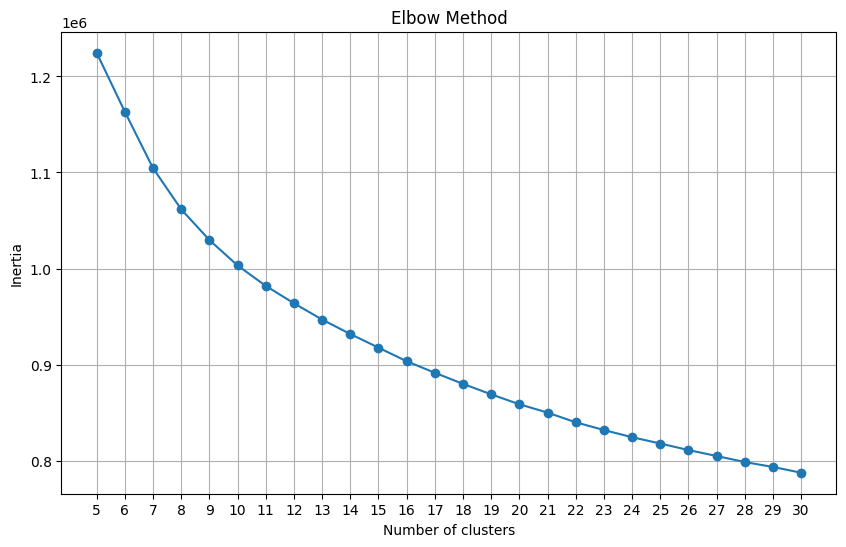

In [74]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xgf)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


# Kmeans 2

In [ ]:
#elbow method 
#db scan - do not specify numer of clusters

In [ ]:
# Cumulative explained variance
#cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the inflection point using the Elbow Method
# In this example, we use a simple heuristic of finding the point where the slope changes the most
#slope = np.diff(cumulative_explained_variance)
#inflection_point = np.argmax(slope) + 1 

#inflection_point

In [59]:
X_not_scaled = df_cleaned

In [41]:
# Fit K-means
km = KMeans(n_clusters=14)
km.fit(dfgf.drop(columns='Name'))

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=14)

In [43]:
dfgf['label'] = km.labels_

/var/folders/8b/dtnxr1xx259b5f5fqdlh_w340000gn/T/ipykernel_2061/2669822166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgf['label'] = km.labels_


In [47]:
dfgf[['Name', 'label']].head(40)

Name  label
0    Kevin De Bruyne                              3
1    Harry Kane                                   3
2    Mohamed Salah                                3
3    Sadio Mané                                   3
4    Son Heung-Min                                3
5    Raheem Sterling                              3
6    Bernardo Silva                               3
7    Roberto Firmino                             10
8    Virgil van Dijk                             10
9    Bruno Fernandes                              3
10   Aymeric Laporte                             10
11   Paul Pogba                                   3
12   Sergio Agüero                                3
13   Thiago                                       3
14   Fabinho                                     10
15   İlkay Gündogan                               3
16   Trent Alexander-Arnold                       3
17   Alisson                                     13
18   Jack Grealish                                3
19   Rúben Dias                                  10
20   Marcus Rashford                              3
21   Riyad Mahrez                                 3
22   Gabriel Jesus                                3
23   João Cancelo                                 3
24   Ederson                                     13
25   Andrew Robertson                            10
26   Rodri                                       10
27   Jordan Henderson                            10
28   Pierre-Emerick Aubameyang                    3
29   Anthony Martial                              3
30   Naby Keïta                                   3
31   Youri Tielemans                              3
32   Thomas Partey                               10
33   Alex Oxlade-Chamberlain                      3
34   Georginio Wijnaldum                         10
35   Raúl Jiménez                                 3
36   Phil Foden                                   3
37   Allan                                       10
38   Joe Gomez                                   10
39   Raphinha                                     3

In [42]:
km.inertia_

5048258.607954624

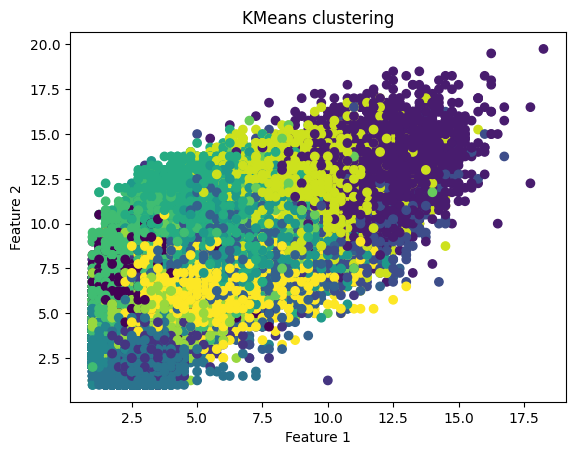

In [78]:
plt.scatter(dfgf.iloc[:,0], dfgf.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

In [79]:
km.labels_[0:5]

array([1, 3, 1, 1, 1], dtype=int32)

In [65]:
X_not_scaled

Age  Height  Weight   Agg   Jum  Pun  Nat .1   Vis  L Th   Lon  ...  \
0       29.0   181.0    68.0  12.0  10.0  1.0    16.0  20.0   8.0  16.0  ...   
1       26.0   188.0    86.0  11.0  13.0  2.0    16.0  18.0   6.0  16.0  ...   
2       28.0   175.0    72.0  10.0   8.0  2.0    17.0  17.0   6.0  13.0  ...   
3       28.0   175.0    69.0  10.0  11.0  3.0    18.0  15.0   3.0  12.0  ...   
4       28.0   183.0    77.0   8.0  10.0  2.0    16.0  12.0   6.0  16.0  ...   
...      ...     ...     ...   ...   ...  ...     ...   ...   ...   ...  ...   
174569  15.0   181.0    65.0  13.0   9.0  3.0     6.0   6.0   2.0   6.0  ...   
174570  16.0   178.0    65.0  15.0   7.0  2.0    13.0   6.0   2.0   5.0  ...   
174571  17.0   196.0    82.0  12.0  15.0  3.0    14.0   6.0   6.0   5.0  ...   
174572  16.0   162.0    55.0  15.0   4.0  1.0    17.0  10.0   3.0   7.0  ...   
174573  16.0   177.0    63.0  10.0   8.0  2.0     7.0   4.0   3.0   5.0  ...   

         Bal  Kic   Sta   Agi   Wor   Bra  Cmd   Fin  1v1  TRO  
0       15.0  3.0  17.0  13.0  15.0  12.0  3.0  16.0  1.0  3.0  
1       13.0  3.0  17.0  12.0  18.0  16.0  2.0  19.0  3.0  3.0  
2       18.0  1.0  14.0  16.0  15.0  11.0  3.0  18.0  3.0  2.0  
3       16.0  1.0  14.0  16.0  15.0  11.0  3.0  17.0  2.0  4.0  
4       12.0  2.0  16.0  15.0  17.0   6.0  2.0  18.0  2.0  1.0  
...      ...  ...   ...   ...   ...   ...  ...   ...  ...  ...  
174569  13.0  1.0  10.0  10.0  15.0   9.0  1.0  14.0  2.0  3.0  
174570  11.0  2.0   8.0   9.0   6.0   6.0  2.0  11.0  2.0  3.0  
174571  16.0  1.0  12.0   8.0  17.0  13.0  2.0   5.0  2.0  1.0  
174572   8.0  3.0   7.0   9.0  11.0   9.0  3.0   6.0  1.0  1.0  
174573   6.0  4.0   8.0  14.0  13.0  16.0  3.0   4.0  1.0  2.0  

[174324 rows x 50 columns]

# New Scaling & Elbow method
We are testing a new scaling in which are going to sum of the numerical features and then divide each feature by the total sum.
This scaling will supposedly enable us to identify better clusters of players that would have the same profile than previously. 
1. Custom scaler 
- Divide each feature by the total sum for each player
- Using .div() for element-wise division
2. Add the total score of the players to the dataset
3. Elbow method on the scaled values

In [86]:
Xgf.sum(axis=1)

0         155.214286
1         166.404762
2         151.892857
3         152.226190
4         142.250000
             ...    
174569    100.130952
174570     86.261905
174571    101.297619
174572     99.892857
174573     90.357143
Length: 174324, dtype: float64

In [87]:
def custom_scaler(Xgf):
    total_score = Xgf.sum(axis=1)

    scaled_Xgf = Xgf.div(total_score, axis=0)

    return scaled_Xgf

In [88]:
scaled_df = custom_scaler(Xgf)
scaled_df

shooting  dribbling_control  passing_vision  tackling_interception  \
0       0.104694           0.104694        0.102010               0.061206   
1       0.100658           0.082630        0.083131               0.072113   
2       0.095462           0.102046        0.091073               0.064190   
3       0.075545           0.108391        0.077735               0.073903   
4       0.093146           0.101933        0.086702               0.059754   
...          ...                ...             ...                    ...   
174569  0.077399           0.099869        0.059922               0.039948   
174570  0.069556           0.121722        0.065691               0.040574   
174571  0.044424           0.054295        0.062522               0.091315   
174572  0.062567           0.085091        0.068407               0.065070   
174573  0.052569           0.110672        0.051647               0.041502   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0             0.036509       0.090198          0.096641         0.106305   
1             0.062098       0.074116          0.088139         0.102161   
2             0.043891       0.114116          0.103143         0.092170   
3             0.059123       0.113866          0.091968         0.098538   
4             0.053896       0.107791          0.089045         0.105448   
...                ...            ...               ...              ...   
174569        0.053264       0.113185          0.093211         0.094876   
174570        0.050235       0.108198          0.092741         0.092741   
174571        0.085556       0.075685          0.115172         0.083911   
174572        0.030032       0.073412          0.060064         0.120129   
174573        0.066403       0.143874          0.062714         0.049802   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0                0.090198    0.045099  0.090198               0.011045   
1                0.106167    0.048076  0.108170               0.015453   
2                0.092170    0.042793  0.092170               0.014108   
3                0.089779    0.029561  0.098538               0.014077   
4                0.084359    0.056239  0.105448               0.014060   
...                   ...         ...       ...                    ...   
174569           0.106527    0.034954  0.099869               0.017120   
174570           0.081148    0.023185  0.092741               0.028153   
174571           0.138207    0.019744  0.128335               0.016923   
174572           0.083423    0.080086  0.160172               0.021452   
174573           0.129117    0.060870  0.110672               0.031621   

        behavioral_attributes  player_traits  
0                    0.041878       0.019328  
1                    0.039061       0.018028  
2                    0.039502       0.013167  
3                    0.042700       0.026277  
4                    0.035149       0.007030  
...                       ...            ...  
174569               0.079895       0.029961  
174570               0.098537       0.034778  
174571               0.074039       0.009872  
174572               0.080086       0.010011  
174573               0.066403       0.022134  

[174324 rows x 14 columns]

In [89]:
scaled_df.iloc[0].sum()

0.9999999999999999

In [90]:
# Adding the player Names to the DataFrame scaled_df + The total score min-max scaled 
scaled_df['Name'] = dfgf['Name']
scaled_df

shooting  dribbling_control  passing_vision  tackling_interception  \
0       0.104694           0.104694        0.102010               0.061206   
1       0.100658           0.082630        0.083131               0.072113   
2       0.095462           0.102046        0.091073               0.064190   
3       0.075545           0.108391        0.077735               0.073903   
4       0.093146           0.101933        0.086702               0.059754   
...          ...                ...             ...                    ...   
174569  0.077399           0.099869        0.059922               0.039948   
174570  0.069556           0.121722        0.065691               0.040574   
174571  0.044424           0.054295        0.062522               0.091315   
174572  0.062567           0.085091        0.068407               0.065070   
174573  0.052569           0.110672        0.051647               0.041502   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0             0.036509       0.090198          0.096641         0.106305   
1             0.062098       0.074116          0.088139         0.102161   
2             0.043891       0.114116          0.103143         0.092170   
3             0.059123       0.113866          0.091968         0.098538   
4             0.053896       0.107791          0.089045         0.105448   
...                ...            ...               ...              ...   
174569        0.053264       0.113185          0.093211         0.094876   
174570        0.050235       0.108198          0.092741         0.092741   
174571        0.085556       0.075685          0.115172         0.083911   
174572        0.030032       0.073412          0.060064         0.120129   
174573        0.066403       0.143874          0.062714         0.049802   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0                0.090198    0.045099  0.090198               0.011045   
1                0.106167    0.048076  0.108170               0.015453   
2                0.092170    0.042793  0.092170               0.014108   
3                0.089779    0.029561  0.098538               0.014077   
4                0.084359    0.056239  0.105448               0.014060   
...                   ...         ...       ...                    ...   
174569           0.106527    0.034954  0.099869               0.017120   
174570           0.081148    0.023185  0.092741               0.028153   
174571           0.138207    0.019744  0.128335               0.016923   
174572           0.083423    0.080086  0.160172               0.021452   
174573           0.129117    0.060870  0.110672               0.031621   

        behavioral_attributes  player_traits  \
0                    0.041878       0.019328   
1                    0.039061       0.018028   
2                    0.039502       0.013167   
3                    0.042700       0.026277   
4                    0.035149       0.007030   
...                       ...            ...   
174569               0.079895       0.029961   
174570               0.098537       0.034778   
174571               0.074039       0.009872   
174572               0.080086       0.010011   
174573               0.066403       0.022134   

                                            Name  
0        Kevin De Bruyne                          
1        Harry Kane                               
2        Mohamed Salah                            
3        Sadio Mané                               
4        Son Heung-Min                            
...                                          ...  
174569          Nick Brown                        
174570          Luis Alcalá                       
174571          Devin Lee                         
174572          Yeferson Suárez                   
174573          Nguyen Van Hai                    

[174324 rows x 15 columns]

In [100]:
# Adding the total score min-max scaled to the DataFrame
# Scale the total score (reshape is required as MinMaxScaler expects 2D input)
from sklearn.preprocessing import MinMaxScaler

def custom_scaler(Xgf):
    total_score = Xgf.sum(axis=1)
    return total_score

total_score = custom_scaler(Xgf)

scaler = MinMaxScaler()

scaled_total_score = scaler.fit_transform(total_score.values.reshape(-1, 1)).flatten()

scaled_df['scaled_total_score'] = scaled_total_score


scaled_df_label_score = scaled_df

In [101]:
scaled_df = scaled_df_label_score.drop(columns='Name')
scaled_df

shooting  dribbling_control  passing_vision  tackling_interception  \
0       0.104694           0.104694        0.102010               0.061206   
1       0.100658           0.082630        0.083131               0.072113   
2       0.095462           0.102046        0.091073               0.064190   
3       0.075545           0.108391        0.077735               0.073903   
4       0.093146           0.101933        0.086702               0.059754   
...          ...                ...             ...                    ...   
174569  0.077399           0.099869        0.059922               0.039948   
174570  0.069556           0.121722        0.065691               0.040574   
174571  0.044424           0.054295        0.062522               0.091315   
174572  0.062567           0.085091        0.068407               0.065070   
174573  0.052569           0.110672        0.051647               0.041502   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0             0.036509       0.090198          0.096641         0.106305   
1             0.062098       0.074116          0.088139         0.102161   
2             0.043891       0.114116          0.103143         0.092170   
3             0.059123       0.113866          0.091968         0.098538   
4             0.053896       0.107791          0.089045         0.105448   
...                ...            ...               ...              ...   
174569        0.053264       0.113185          0.093211         0.094876   
174570        0.050235       0.108198          0.092741         0.092741   
174571        0.085556       0.075685          0.115172         0.083911   
174572        0.030032       0.073412          0.060064         0.120129   
174573        0.066403       0.143874          0.062714         0.049802   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0                0.090198    0.045099  0.090198               0.011045   
1                0.106167    0.048076  0.108170               0.015453   
2                0.092170    0.042793  0.092170               0.014108   
3                0.089779    0.029561  0.098538               0.014077   
4                0.084359    0.056239  0.105448               0.014060   
...                   ...         ...       ...                    ...   
174569           0.106527    0.034954  0.099869               0.017120   
174570           0.081148    0.023185  0.092741               0.028153   
174571           0.138207    0.019744  0.128335               0.016923   
174572           0.083423    0.080086  0.160172               0.021452   
174573           0.129117    0.060870  0.110672               0.031621   

        behavioral_attributes  player_traits  scaled_total_score  Label  
0                    0.041878       0.019328            0.823356     15  
1                    0.039061       0.018028            0.907472      5  
2                    0.039502       0.013167            0.798389     15  
3                    0.042700       0.026277            0.800895     15  
4                    0.035149       0.007030            0.725906     15  
...                       ...            ...                 ...    ...  
174569               0.079895       0.029961            0.409306      5  
174570               0.098537       0.034778            0.305056     11  
174571               0.074039       0.009872            0.418076      9  
174572               0.080086       0.010011            0.407517      1  
174573               0.066403       0.022134            0.335839     14  

[174324 rows x 16 columns]

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

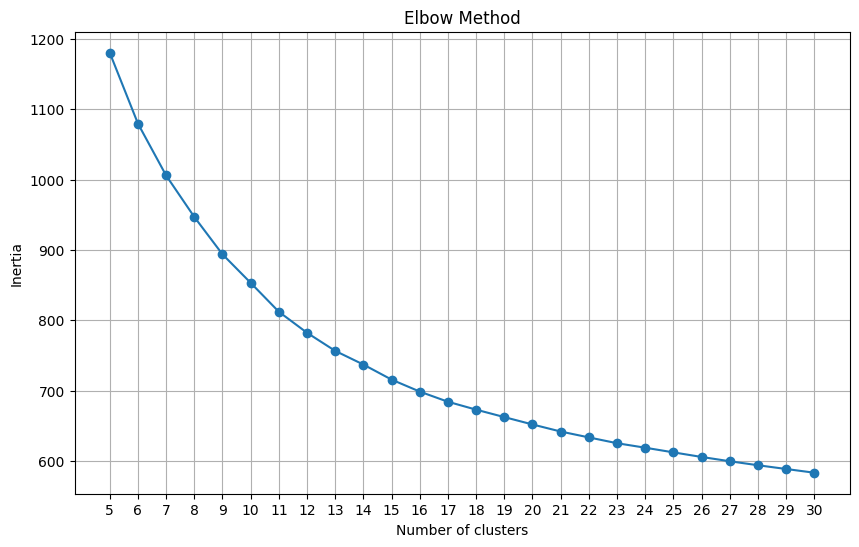

In [61]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

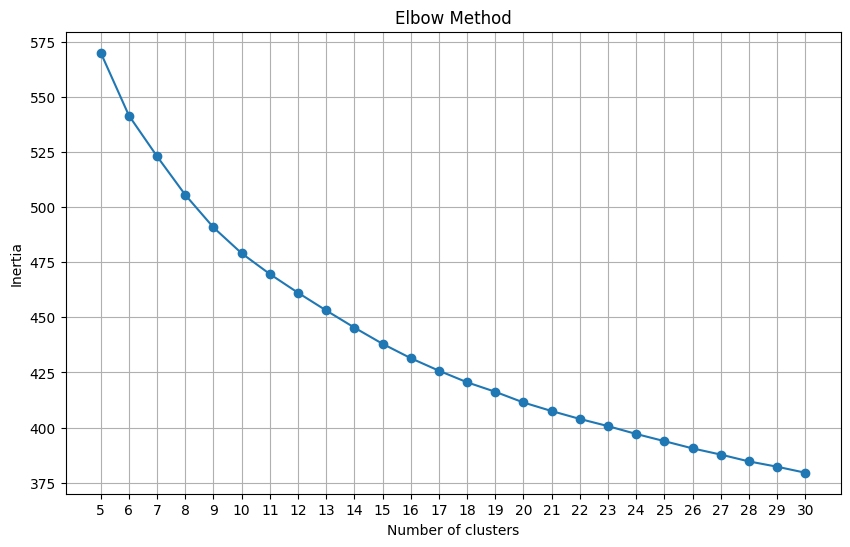

In [62]:
scaled_df = scaled_df.drop(columns='scaled_total_score')
scaled_df
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [103]:
scaled_df

shooting  dribbling_control  passing_vision  tackling_interception  \
0       0.104694           0.104694        0.102010               0.061206   
1       0.100658           0.082630        0.083131               0.072113   
2       0.095462           0.102046        0.091073               0.064190   
3       0.075545           0.108391        0.077735               0.073903   
4       0.093146           0.101933        0.086702               0.059754   
...          ...                ...             ...                    ...   
174569  0.077399           0.099869        0.059922               0.039948   
174570  0.069556           0.121722        0.065691               0.040574   
174571  0.044424           0.054295        0.062522               0.091315   
174572  0.062567           0.085091        0.068407               0.065070   
174573  0.052569           0.110672        0.051647               0.041502   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0             0.036509       0.090198          0.096641         0.106305   
1             0.062098       0.074116          0.088139         0.102161   
2             0.043891       0.114116          0.103143         0.092170   
3             0.059123       0.113866          0.091968         0.098538   
4             0.053896       0.107791          0.089045         0.105448   
...                ...            ...               ...              ...   
174569        0.053264       0.113185          0.093211         0.094876   
174570        0.050235       0.108198          0.092741         0.092741   
174571        0.085556       0.075685          0.115172         0.083911   
174572        0.030032       0.073412          0.060064         0.120129   
174573        0.066403       0.143874          0.062714         0.049802   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0                0.090198    0.045099  0.090198               0.011045   
1                0.106167    0.048076  0.108170               0.015453   
2                0.092170    0.042793  0.092170               0.014108   
3                0.089779    0.029561  0.098538               0.014077   
4                0.084359    0.056239  0.105448               0.014060   
...                   ...         ...       ...                    ...   
174569           0.106527    0.034954  0.099869               0.017120   
174570           0.081148    0.023185  0.092741               0.028153   
174571           0.138207    0.019744  0.128335               0.016923   
174572           0.083423    0.080086  0.160172               0.021452   
174573           0.129117    0.060870  0.110672               0.031621   

        behavioral_attributes  player_traits  scaled_total_score  \
0                    0.041878       0.019328            0.823356   
1                    0.039061       0.018028            0.907472   
2                    0.039502       0.013167            0.798389   
3                    0.042700       0.026277            0.800895   
4                    0.035149       0.007030            0.725906   
...                       ...            ...                 ...   
174569               0.079895       0.029961            0.409306   
174570               0.098537       0.034778            0.305056   
174571               0.074039       0.009872            0.418076   
174572               0.080086       0.010011            0.407517   
174573               0.066403       0.022134            0.335839   

                                            Name  
0        Kevin De Bruyne                          
1        Harry Kane                               
2        Mohamed Salah                            
3        Sadio Mané                               
4        Son Heung-Min                            
...                                          ...  
174569          Nick Brown                        
174570          Luis Alcalá                 

In [109]:
scaled_df = scaled_df.drop(columns='Name')
scaled_df

shooting  dribbling_control  passing_vision  tackling_interception  \
0       0.104694           0.104694        0.102010               0.061206   
1       0.100658           0.082630        0.083131               0.072113   
2       0.095462           0.102046        0.091073               0.064190   
3       0.075545           0.108391        0.077735               0.073903   
4       0.093146           0.101933        0.086702               0.059754   
...          ...                ...             ...                    ...   
174569  0.077399           0.099869        0.059922               0.039948   
174570  0.069556           0.121722        0.065691               0.040574   
174571  0.044424           0.054295        0.062522               0.091315   
174572  0.062567           0.085091        0.068407               0.065070   
174573  0.052569           0.110672        0.051647               0.041502   

        aerial_defense  speed_agility  strength_stamina  decision_making  \
0             0.036509       0.090198          0.096641         0.106305   
1             0.062098       0.074116          0.088139         0.102161   
2             0.043891       0.114116          0.103143         0.092170   
3             0.059123       0.113866          0.091968         0.098538   
4             0.053896       0.107791          0.089045         0.105448   
...                ...            ...               ...              ...   
174569        0.053264       0.113185          0.093211         0.094876   
174570        0.050235       0.108198          0.092741         0.092741   
174571        0.085556       0.075685          0.115172         0.083911   
174572        0.030032       0.073412          0.060064         0.120129   
174573        0.066403       0.143874          0.062714         0.049802   

        work_ethic_effort  leadership  teamwork  goalkeeping_abilities  \
0                0.090198    0.045099  0.090198               0.011045   
1                0.106167    0.048076  0.108170               0.015453   
2                0.092170    0.042793  0.092170               0.014108   
3                0.089779    0.029561  0.098538               0.014077   
4                0.084359    0.056239  0.105448               0.014060   
...                   ...         ...       ...                    ...   
174569           0.106527    0.034954  0.099869               0.017120   
174570           0.081148    0.023185  0.092741               0.028153   
174571           0.138207    0.019744  0.128335               0.016923   
174572           0.083423    0.080086  0.160172               0.021452   
174573           0.129117    0.060870  0.110672               0.031621   

        behavioral_attributes  player_traits  scaled_total_score  
0                    0.041878       0.019328            0.823356  
1                    0.039061       0.018028            0.907472  
2                    0.039502       0.013167            0.798389  
3                    0.042700       0.026277            0.800895  
4                    0.035149       0.007030            0.725906  
...                       ...            ...                 ...  
174569               0.079895       0.029961            0.409306  
174570               0.098537       0.034778            0.305056  
174571               0.074039       0.009872            0.418076  
174572               0.080086       0.010011            0.407517  
174573               0.066403       0.022134            0.335839  

[174324 rows x 15 columns]

In [110]:
# Fit K-means
km = KMeans(n_clusters=16)
km.fit(scaled_df)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=16)

In [111]:
km.labels_

array([14, 14, 14, ...,  0,  0, 11], dtype=int32)

In [112]:
scaled_df['Name'] = dfgf['Name']
scaled_df['Label'] = km.labels_
scaled_df.head(40)

shooting  dribbling_control  passing_vision  tackling_interception  \
0   0.104694           0.104694        0.102010               0.061206   
1   0.100658           0.082630        0.083131               0.072113   
2   0.095462           0.102046        0.091073               0.064190   
3   0.075545           0.108391        0.077735               0.073903   
4   0.093146           0.101933        0.086702               0.059754   
5   0.071250           0.103482        0.082559               0.071250   
6   0.086849           0.108956        0.085270               0.061584   
7   0.070192           0.104509        0.083191               0.088910   
8   0.055342           0.085385        0.056923               0.107522   
9   0.106599           0.100235        0.090158               0.052504   
10  0.063801           0.086131        0.077624               0.102081   
11  0.095186           0.116521        0.079869               0.064004   
12  0.093885           0.114003        0.073767               0.053648   
13  0.078834           0.117412        0.089457               0.088898   
14  0.062850           0.087023        0.066610               0.103139   
15  0.086832           0.100191        0.080153               0.080153   
16  0.077407           0.095147        0.097834               0.085471   
17  0.017444           0.077046        0.044580               0.056694   
18  0.091908           0.112717        0.085549               0.065896   
19  0.038674           0.073985        0.058291               0.107615   
20  0.096977           0.109320        0.067003               0.037028   
21  0.104738           0.127182        0.102244               0.059850   
22  0.084126           0.110416        0.077116               0.061342   
23  0.082024           0.115904        0.095101               0.078458   
24  0.050585           0.063593        0.064556               0.044804   
25  0.042898           0.085795        0.095695               0.098994   
26  0.061037           0.086469        0.074600               0.100032   
27  0.058032           0.080940        0.076358               0.091630   
28  0.097507           0.100929        0.067286               0.058162   
29  0.087686           0.116319        0.062037               0.044738   
30  0.073266           0.103935        0.079513               0.097120   
31  0.087081           0.102153        0.084848               0.085407   
32  0.068643           0.080084        0.076271               0.091525   
33  0.083705           0.103795        0.091518               0.077009   
34  0.054662           0.097728        0.072882               0.092759   
35  0.095053           0.080044        0.068927               0.066704   
36  0.090832           0.115766        0.091426               0.065898   
37  0.063469           0.088523        0.065696               0.103555   
38  0.030892           0.089245        0.069794               0.102975   
39  0.097551           0.117061        0.093412               0.072720   

    aerial_defense  speed_agility  strength_stamina  decision_making  \
0         0.036509       0.090198          0.096641         0.106305   
1         0.062098       0.074116          0.088139         0.102161   
2         0.043891       0.114116          0.103143         0.092170   
3         0.059123       0.113866          0.091968         0.098538   
4         0.053896       0.107791          0.089045         0.105448   
5         0.047500       0.122142          0.097261         0.088214   
6         0.040003       0.101060          0.086322         0.101060   
7         0.056154       0.085271          0.097749         0.096710   
8         0.078006       0.090656          0.096981         0.104360   
9         0.044549       0.089098          0.091219         0.085916   
10        0.070181       0.087194          0.089321         0.102081   
11        0.067834       0.091904          0.115974         0.091904   
12        0.049178       0.111768

In [113]:
# Assuming 'km' is your fitted KMeans model
labels = km.labels_

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Number of unique labels
num_unique_labels = len(unique_labels)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 14213
Label: 1, Count: 12983
Label: 2, Count: 14308
Label: 3, Count: 10835
Label: 4, Count: 4599
Label: 5, Count: 4504
Label: 6, Count: 19118
Label: 7, Count: 19427
Label: 8, Count: 5612
Label: 9, Count: 13664
Label: 10, Count: 6097
Label: 11, Count: 17619
Label: 12, Count: 16024
Label: 13, Count: 2716
Label: 14, Count: 5998
Label: 15, Count: 6607


In [97]:
km = KMeans(n_clusters=16)
km.fit(scaled_df.drop(columns=['Name', 'Label', 'scaled_total_score']))

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=16)

In [98]:
scaled_df['Name'] = dfgf['Name']
scaled_df['Label'] = km.labels_
scaled_df.head(40)

shooting  dribbling_control  passing_vision  tackling_interception  \
0   0.104694           0.104694        0.102010               0.061206   
1   0.100658           0.082630        0.083131               0.072113   
2   0.095462           0.102046        0.091073               0.064190   
3   0.075545           0.108391        0.077735               0.073903   
4   0.093146           0.101933        0.086702               0.059754   
5   0.071250           0.103482        0.082559               0.071250   
6   0.086849           0.108956        0.085270               0.061584   
7   0.070192           0.104509        0.083191               0.088910   
8   0.055342           0.085385        0.056923               0.107522   
9   0.106599           0.100235        0.090158               0.052504   
10  0.063801           0.086131        0.077624               0.102081   
11  0.095186           0.116521        0.079869               0.064004   
12  0.093885           0.114003        0.073767               0.053648   
13  0.078834           0.117412        0.089457               0.088898   
14  0.062850           0.087023        0.066610               0.103139   
15  0.086832           0.100191        0.080153               0.080153   
16  0.077407           0.095147        0.097834               0.085471   
17  0.017444           0.077046        0.044580               0.056694   
18  0.091908           0.112717        0.085549               0.065896   
19  0.038674           0.073985        0.058291               0.107615   
20  0.096977           0.109320        0.067003               0.037028   
21  0.104738           0.127182        0.102244               0.059850   
22  0.084126           0.110416        0.077116               0.061342   
23  0.082024           0.115904        0.095101               0.078458   
24  0.050585           0.063593        0.064556               0.044804   
25  0.042898           0.085795        0.095695               0.098994   
26  0.061037           0.086469        0.074600               0.100032   
27  0.058032           0.080940        0.076358               0.091630   
28  0.097507           0.100929        0.067286               0.058162   
29  0.087686           0.116319        0.062037               0.044738   
30  0.073266           0.103935        0.079513               0.097120   
31  0.087081           0.102153        0.084848               0.085407   
32  0.068643           0.080084        0.076271               0.091525   
33  0.083705           0.103795        0.091518               0.077009   
34  0.054662           0.097728        0.072882               0.092759   
35  0.095053           0.080044        0.068927               0.066704   
36  0.090832           0.115766        0.091426               0.065898   
37  0.063469           0.088523        0.065696               0.103555   
38  0.030892           0.089245        0.069794               0.102975   
39  0.097551           0.117061        0.093412               0.072720   

    aerial_defense  speed_agility  strength_stamina  decision_making  \
0         0.036509       0.090198          0.096641         0.106305   
1         0.062098       0.074116          0.088139         0.102161   
2         0.043891       0.114116          0.103143         0.092170   
3         0.059123       0.113866          0.091968         0.098538   
4         0.053896       0.107791          0.089045         0.105448   
5         0.047500       0.122142          0.097261         0.088214   
6         0.040003       0.101060          0.086322         0.101060   
7         0.056154       0.085271          0.097749         0.096710   
8         0.078006       0.090656          0.096981         0.104360   
9         0.044549       0.089098          0.091219         0.085916   
10        0.070181       0.087194          0.089321         0.102081   
11        0.067834       0.091904          0.115974         0.091904   
12        0.049178       0.111768

In [99]:
# Assuming 'km' is your fitted KMeans model
labels = km.labels_

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Number of unique labels
num_unique_labels = len(unique_labels)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 7277
Label: 1, Count: 20673
Label: 2, Count: 5646
Label: 3, Count: 8064
Label: 4, Count: 6659
Label: 5, Count: 13013
Label: 6, Count: 11251
Label: 7, Count: 6837
Label: 8, Count: 9777
Label: 9, Count: 17077
Label: 10, Count: 9044
Label: 11, Count: 12763
Label: 12, Count: 5996
Label: 13, Count: 13061
Label: 14, Count: 9788
Label: 15, Count: 17398
